In [200]:
#Here are the trends that have been observed based on the data in the city_data and ride_data csv files:

#Trend 1 - There  seem to be far fewer people in the rural areas taking rides, compared to people in the urban
#and suburban areas; with urban coming first and suburban second. 

#Trend 2 - The average fare for rides from the rural areas seems to be on the higher side, followed by that from the suburban areas, 
#the cheapest being that from urban areas

#Trend 3 - Urban areas contribute to the highest percentage of fares, followed by the suburban, and then followed by rural areas,
#which have a significantly less contribution.

#Trend 4 - There are significantly fewer number of drivers in the rural areas, compared to the urban and suburban areas. 
#The urban areas have the most number of drivers, suburban a far second.

In [201]:
%matplotlib inline

In [202]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [203]:
#read the input files
citydf = pd.read_csv("city_data.csv")

ridedf = pd.read_csv("ride_data.csv")


In [204]:
#Average fare and Total number of rides per city
rideAggdf = ridedf[["city","fare"]].groupby(["city"],as_index = False).mean()
drivercount = ridedf[["city","ride_id"]].groupby(["city"],as_index = False).count()

#Merge the above aggregated data with the city dataframe, on the city
cityAggRidedf = pd.merge(citydf, rideAggdf, on=("city","city"))
cityAggRidedf1 = pd.merge(cityAggRidedf, drivercount, on=("city","city"))

#Update the "type" (city type) to a corresponding color, based on its value so that it can be reflected in the color of the bubbles
#Updated in a separate dataframe, to be able to validate substitution against the original dataframe
cityAggRidedf2 = cityAggRidedf1.replace({"Rural":"gold","Suburban":"lightskyblue","Urban":"lightcoral" })



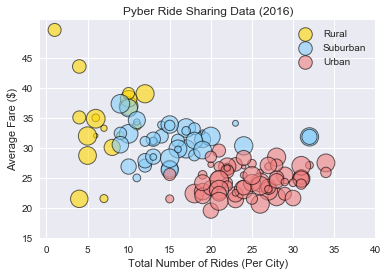

In [205]:
#Bubble Chart -- count of rides/city on x axis, avg fare/city on y axis, bubble size corresponds to the 
#number of drivers/city, bubble color corresponds to the type of city i.e. urban, suburban, rural 

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Define the colors for the bubbles in the plot
color = ["gold","lightskyblue","lightcoral"]

#Plot the scatter plot in iterations, one for each city type (so that the legend can appear appropriately)
for i in color:
    x = cityAggRidedf2.loc[cityAggRidedf2["type"]== i,["ride_id"] ]
    y = cityAggRidedf2.loc[cityAggRidedf2["type"]== i,["fare"] ]
    
    if i == "gold":
        legendLabel = "Rural"
    elif i == "lightskyblue":
         legendLabel = "Suburban"
    else:
         legendLabel = "Urban"
    plt.scatter(x,y, marker = "o", edgecolors = "k",
            s=cityAggRidedf2["driver_count"]*5, c=i,alpha=0.6,linewidth = 1,label = legendLabel )
    
    plt.xticks([0,5,10,15,20,25,30,35,40])
    plt.yticks([15,20,25,30,35,40,45])

plt.legend()
plt.show()


([<matplotlib.patches.Wedge at 0x1fb097c9b00>,
  <matplotlib.text.Text at 0x1fb097e0b00>])

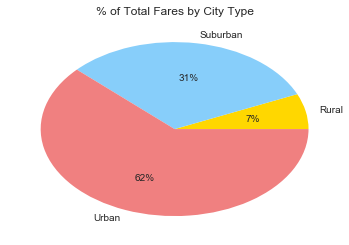

In [206]:
#Pie Chart - % of Total Fares by City Type

label = ["Rural","Suburban","Urban"]
# plt.pie(cityAggRidedf2["fare"],labels = label,colors = color)

#Compute the sum of fare by city
sumFareByCitydf = ridedf[["city","fare"]].groupby(["city"],as_index=False).sum()

#Merge above dataframe with the city dataframe
sumFareByCityTypedf = pd.merge(sumFareByCitydf, citydf, on=("city","city"))

#Sum of fares by city type
sumFareByCityTypedf = sumFareByCityTypedf[["type","fare"]].groupby(["type"],as_index = False).sum()
sumFares = sumFareByCityTypedf["fare"].sum()

#Plot the pie chart
plt.title("% of Total Fares by City Type")
plt.pie((sumFareByCityTypedf["fare"]/sumFares)*100,labels = label, colors = color,autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x1fb098509b0>,
  <matplotlib.text.Text at 0x1fb098679b0>])

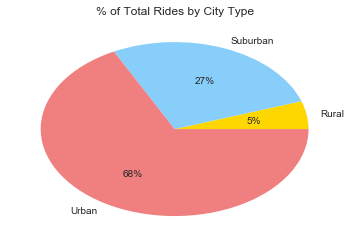

In [207]:
#Pie Chart - % of Total Rides by City Type

#Compute the sum of rides by city
sumRidesByCitydf = ridedf[["city","ride_id"]].groupby(["city"],as_index=False).count()
sumRidesByCitydf

#Merge above dataframe with the city dataframe
sumRidesByCityTypedf = pd.merge(sumRidesByCitydf, citydf, on=("city","city"))

#Sum of rides by city type
sumRidesByCityTypedf = sumRidesByCityTypedf[["type","ride_id"]].groupby(["type"],as_index = False).sum()
sumRides = sumRidesByCityTypedf["ride_id"].sum()
sumRides

#Plot the pie chart
plt.title("% of Total Rides by City Type")
plt.pie((sumRidesByCityTypedf["ride_id"]/sumRides)*100,labels = label, colors = color,autopct='%1.0f%%')


([<matplotlib.patches.Wedge at 0x1fb098d16a0>,
  <matplotlib.text.Text at 0x1fb098e96a0>])

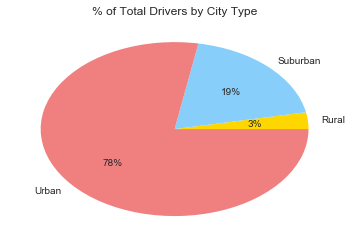

In [208]:
#Pie Chart - % of Total Drivers by City Type

#Sum of drivers by city type
sumDriversByCityTypedf = citydf[["type","driver_count"]].groupby(["type"],as_index = False).sum()
sumDriversByCityTypedf
sumDrivers = sumDriversByCityTypedf["driver_count"].sum()

#Plot the pie chart
plt.title("% of Total Drivers by City Type")
plt.pie((sumDriversByCityTypedf["driver_count"]/sumDrivers)*100,labels = label, colors = color,autopct='%1.0f%%')